# Sales Store

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

**Uploading the data**

In [2]:
strdf = pd.read_csv('DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv')

In [3]:
strdf

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
strdf.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
strdf.duplicated().sum()

0

**Task1**

In [6]:
strdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
strdf=strdf[["date","sales"]]
strdf["date"]=pd.to_datetime(strdf["date"],format='mixed')
strdf=strdf.set_index("date")
strdf.sort_index(inplace=True)

In [8]:
data=strdf.resample("M").mean()

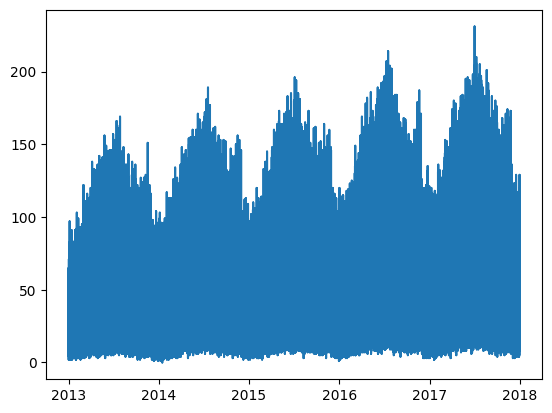

In [9]:
plt.plot(strdf["sales"])
plt.show()

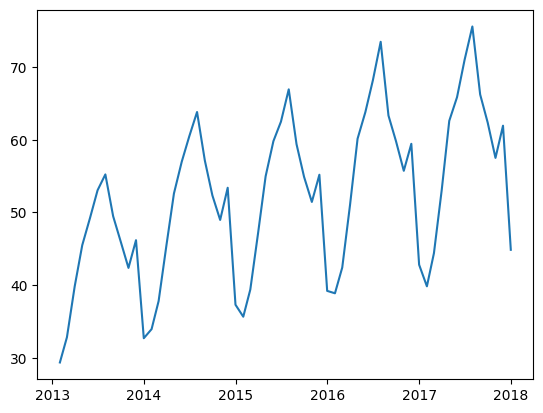

In [10]:
plt.plot(data["sales"])
plt.show()

**Task2**

In [12]:
decomposition=seasonal_decompose(strdf["sales"],period=7)

In [13]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

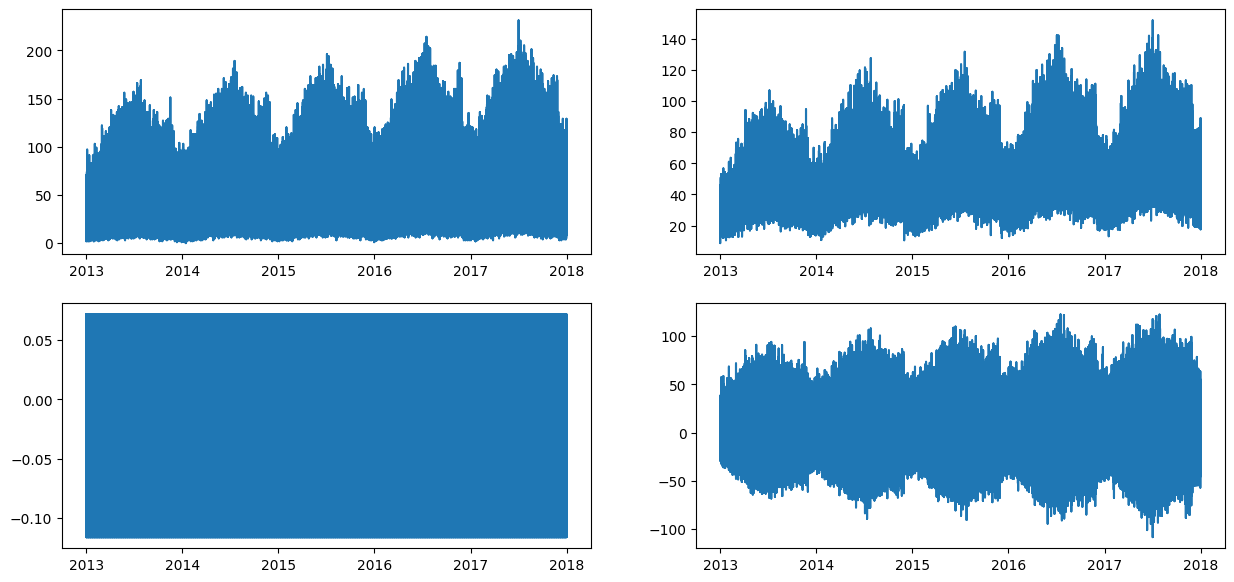

In [14]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.ravel()
ax[0].plot(strdf.index,strdf["sales"])
ax[1].plot(strdf.index,trend)
ax[2].plot(strdf.index,seasonal)
ax[3].plot(strdf.index,residual)
plt.show()

In [15]:
# resample data

In [16]:
decomposition=seasonal_decompose(data["sales"],period=7)

In [17]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

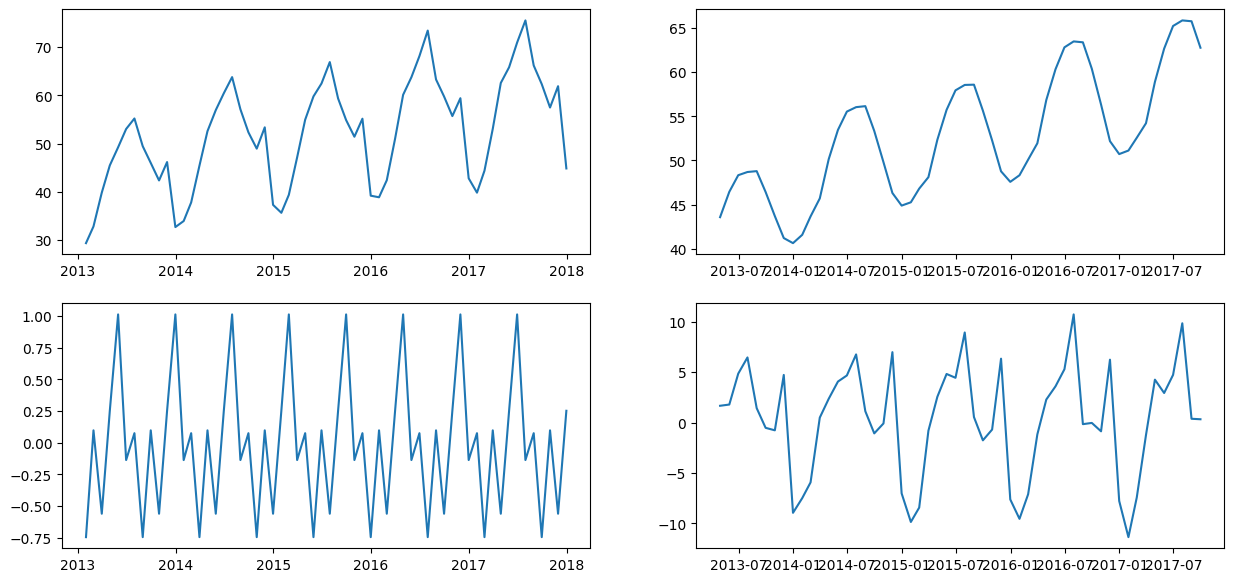

In [18]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.ravel()
ax[0].plot(data.index,data["sales"])
ax[1].plot(data.index,trend)
ax[2].plot(data.index,seasonal)
ax[3].plot(data.index,residual)
plt.show()

In [19]:
#chk for stationary

In [20]:
# H0 : Data is not stationary
# Ha : data is stationary
# pvalue<alpha : Reject H0
# -adf_stat<-adf_critical :Reject H0
# alpha=0.05

In [23]:
adf_result=adfuller(data['sales'])

In [24]:
adf_stat=adf_result[0]
adf_pvalue=adf_result[1]
adf_critical=adf_result[4]

In [25]:
print('adf_stat', adf_stat)
print('adf_pvalue',adf_pvalue)
print('adf_critical',adf_critical)

adf_stat -5.382140238832271
adf_pvalue 3.692387626163227e-06
adf_critical {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


In [26]:
#pval < 0.05 
# accept the null hypo.
# data  is stationary

In [27]:
#splitting the data

In [28]:
train,test=train_test_split(data,test_size=0.3,random_state=42)

**SimpleExpoSmooth**

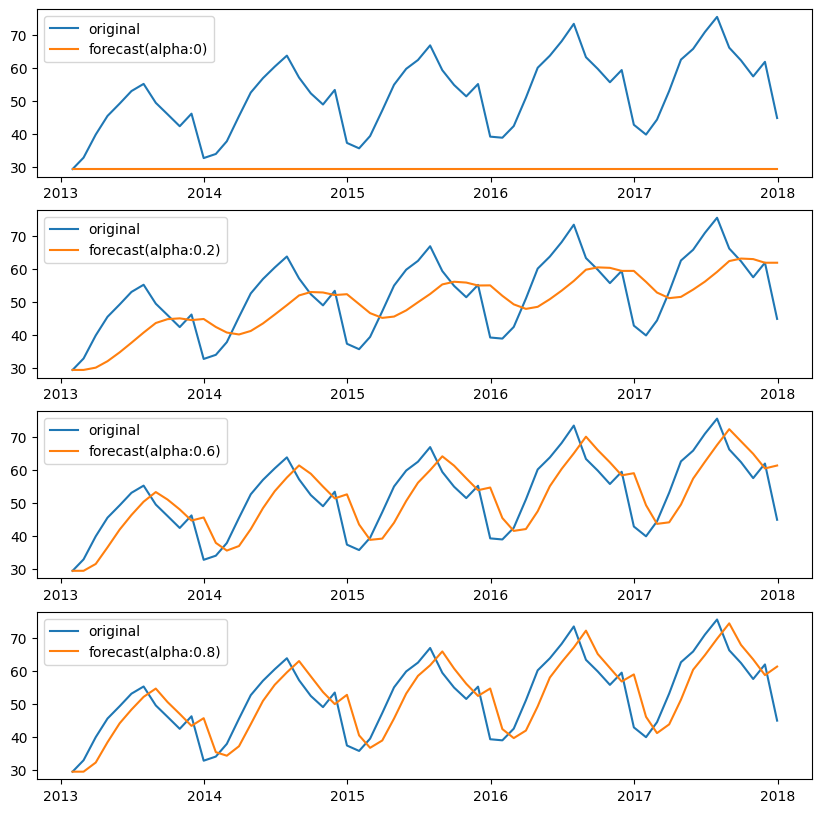

In [29]:
alpha=[0,0.2,0.6,0.8]
fig,ax=plt.subplots(len(alpha),figsize=(10,10))
for i,ap in enumerate (alpha):
    model=SimpleExpSmoothing(data["sales"])
    fitted_model=model.fit(smoothing_level=ap,optimized=False)
    forecast=fitted_model.fittedvalues
    
    
    ax[i].plot(data["sales"],label="original")
    ax[i].plot(forecast,label="forecast(alpha:{})".format(ap))
    ax[i].legend()

In [30]:
# measures evaluation

In [31]:
alpha=0.6
model=SimpleExpSmoothing(train)
fitted_model=model.fit(smoothing_level=alpha,optimized=False)
forecast=fitted_model.forecast(len(test))

rmse=mean_squared_error(test,forecast,squared=False)
mse=mean_squared_error(test,forecast)
mae=mean_absolute_error(test,forecast)
mape=mean_absolute_percentage_error(test,forecast)
print("rmse:",rmse)
print("mse:",mse)
print("mae:",mae)
print("mape:",mape)

rmse: 12.165003444665516
mse: 147.98730880872384
mae: 9.43641728066693
mape: 0.2224323269830903


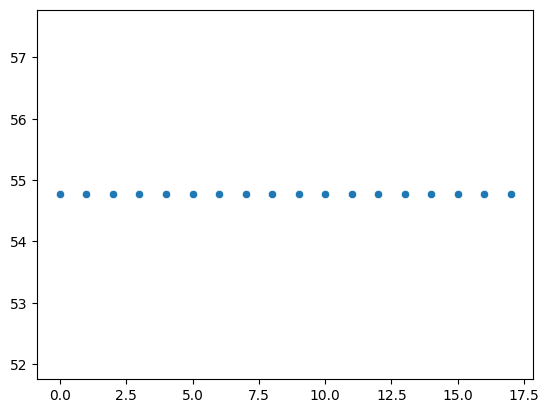

In [34]:
sns.scatterplot(forecast.values)
plt.show()

**DoubleExpoSmoothng**

In [35]:
alpha=[0,0.2,0.6,0.8]
beta=[0,0.2,0.6,0.8]

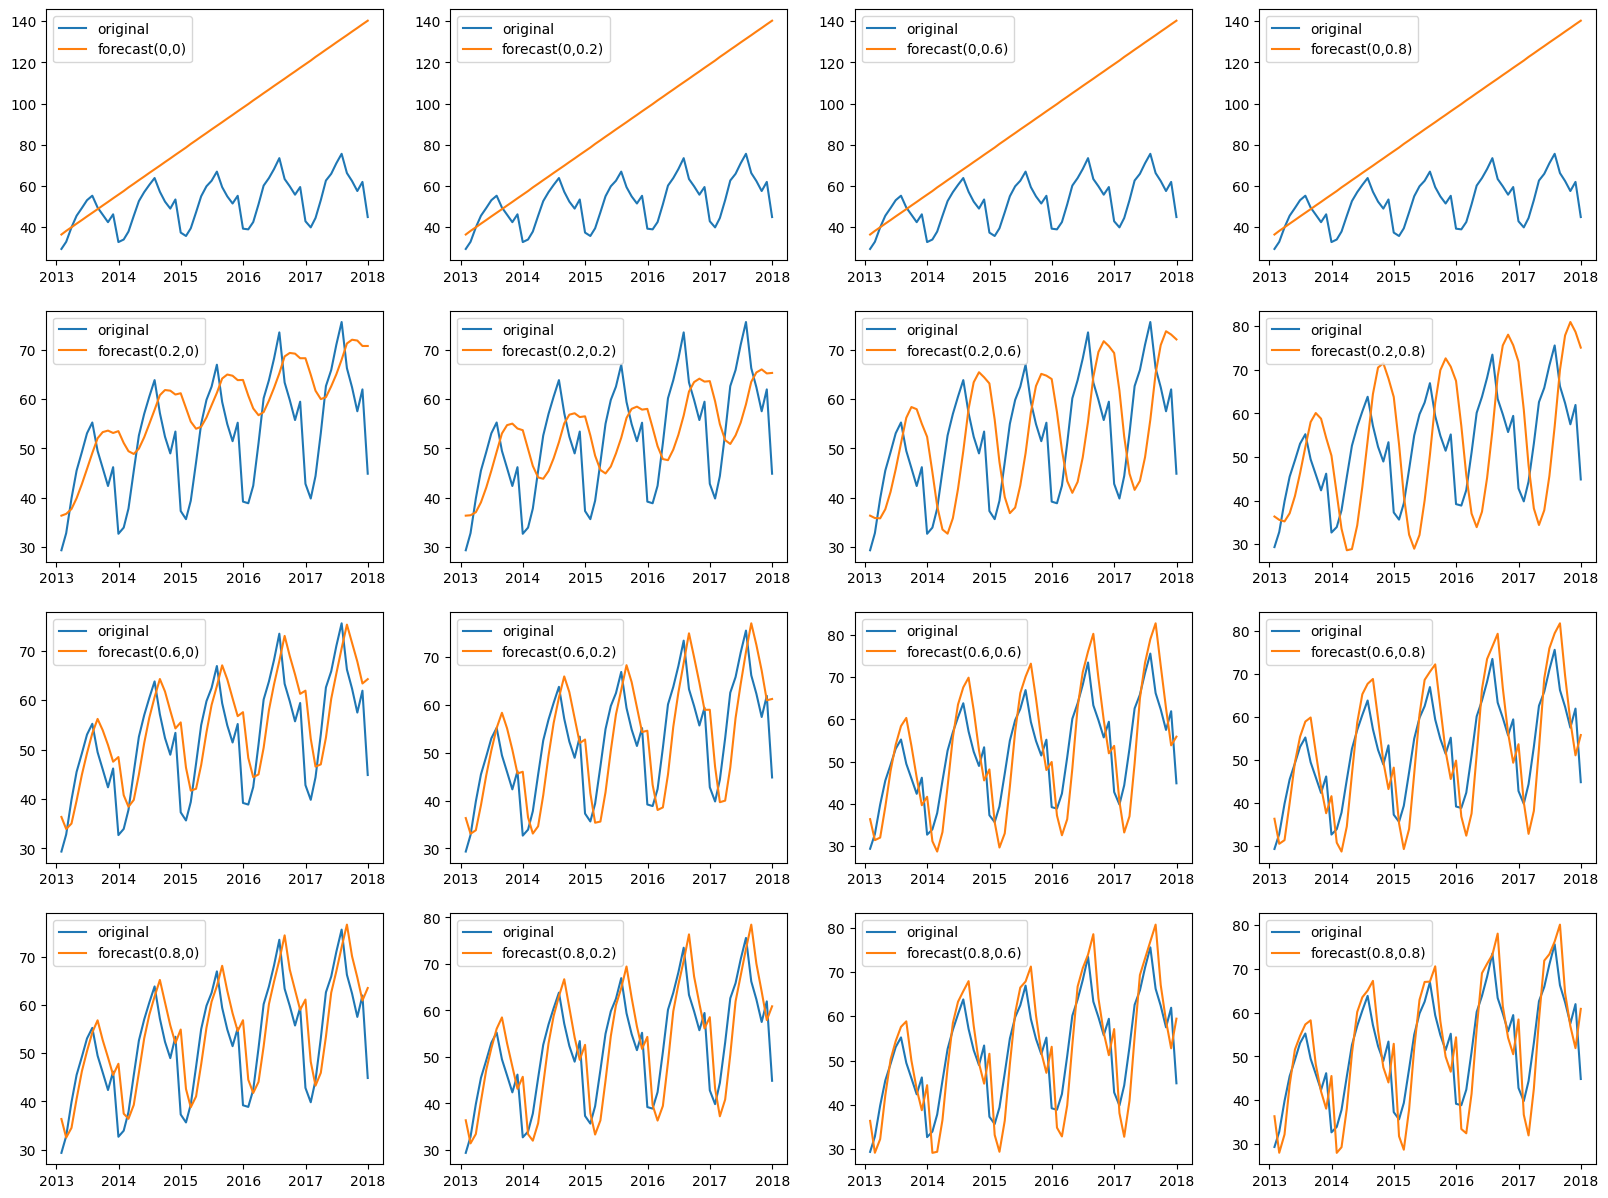

In [36]:
fig,ax=plt.subplots(len(alpha),len(beta),figsize=(20,15))
for i,ap in enumerate (alpha):
    for j,b in enumerate (beta):
        model=ExponentialSmoothing(data,trend="add")
        fitted_model=model.fit(smoothing_level=ap,smoothing_trend=b,  optimized=False)
        forecast=fitted_model.fittedvalues

        ax[i,j].plot(data["sales"],label="original")
        ax[i,j].plot(forecast,label="forecast({},{})".format(ap,b))
        ax[i,j].legend()

In [37]:
alpha=0.6
beta=0.2
model=ExponentialSmoothing(train,trend="add")
fitted_model=model.fit(smoothing_level=alpha,smoothing_trend=beta,optimized=False)
forecast=fitted_model.forecast(len(test))

rmse=mean_squared_error(test,forecast,squared=False)
mse=mean_squared_error(test,forecast)
mae=mean_absolute_error(test,forecast)
mape=mean_absolute_percentage_error(test,forecast)
print("rmse:",rmse)
print("mse:",mse)
print("mae:",mae)
print("mape:",mape)

rmse: 12.489472715121506
mse: 155.98692870176458
mae: 9.596438915407806
mape: 0.22939107376900372


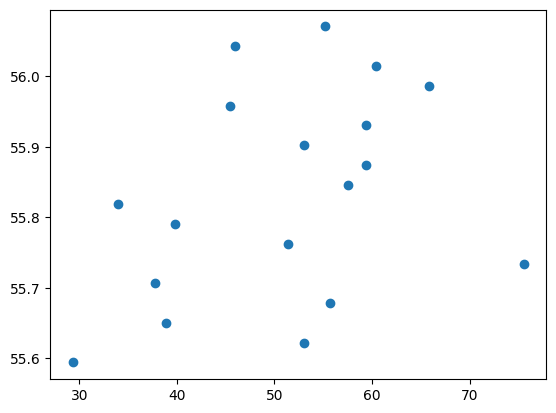

In [42]:
plt.scatter(test["sales"],forecast.values)
plt.show()

**TripleExpoSmoothng**

In [43]:
alpha=[0,0.2]
beta=[0,0.2]
gamma=[0,0.2]

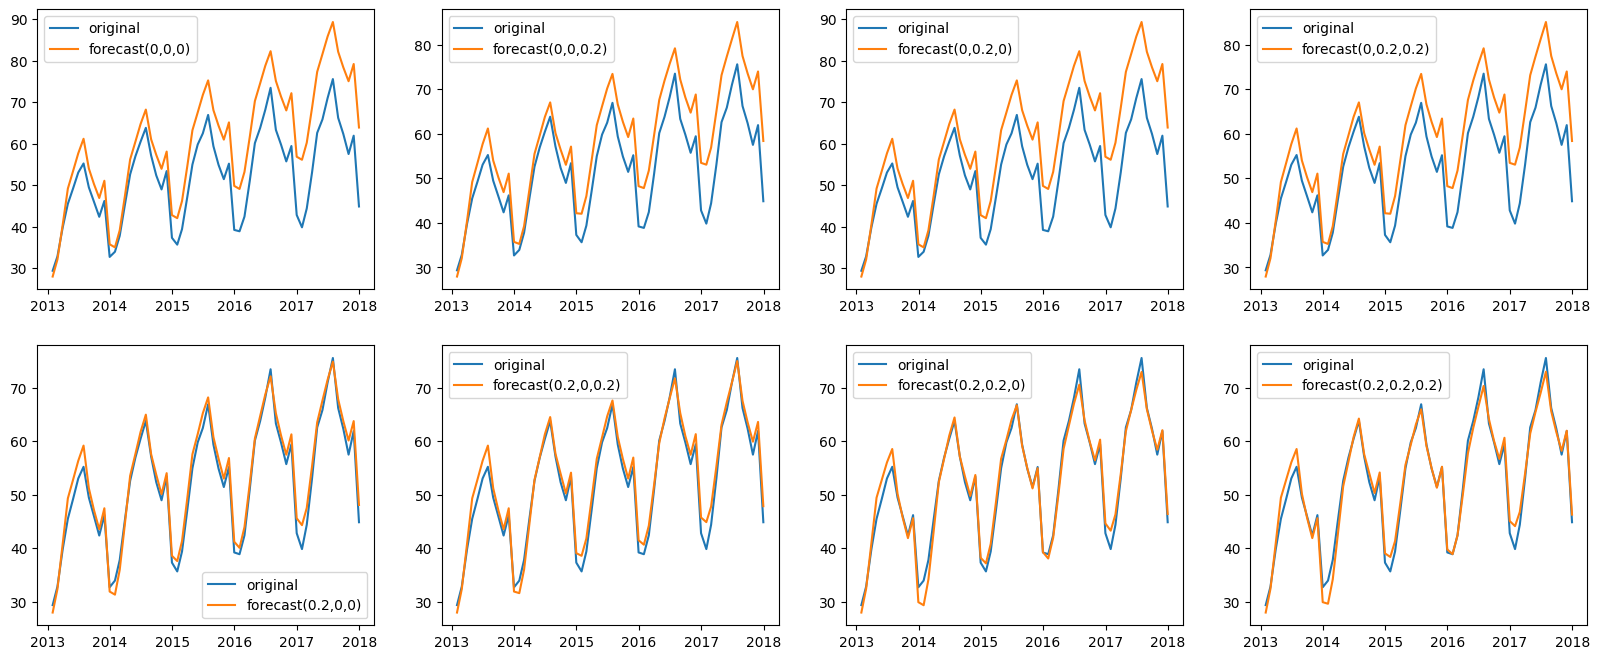

In [44]:
fig,ax=plt.subplots(2,4,figsize=(20,8))
for i,ap in enumerate (alpha):
    for j,b in enumerate (beta):
        for k,g in enumerate (gamma):
            model=ExponentialSmoothing(data,trend="add",seasonal="add",seasonal_periods=12)
            fitted_model=model.fit(smoothing_level=ap,smoothing_trend=b,smoothing_seasonal=g,optimized=False)
            forecast=fitted_model.fittedvalues

            ax[i,j*len(gamma)+k].plot(data["sales"],label="original")
            ax[i,j*len(gamma)+k].plot(forecast,label="forecast({},{},{})".format(ap,b,g))
            ax[i,j*len(gamma)+k].legend()

In [45]:
alpha=0.2
beta=0
gamma=0
model=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=12)
fitted_model=model.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,optimized=False)
forecast=fitted_model.forecast(len(test))

rmse=mean_squared_error(test,forecast,squared=False)
mse=mean_squared_error(test,forecast)
mae=mean_absolute_error(test,forecast)
mape=mean_absolute_percentage_error(test,forecast)
print("rmse:",rmse)
print("mse:",mse)
print("mae:",mae)
print("mape:",mape)

rmse: 14.270143047159172
mse: 203.63698258638527
mae: 11.868452113421881
mape: 0.2641738185772413


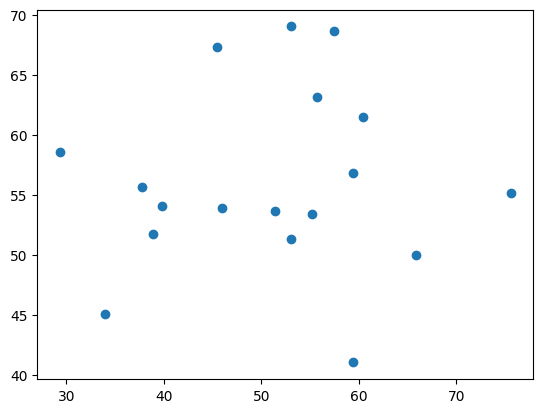

In [46]:
plt.scatter(test["sales"],forecast.values)
plt.show()

In [47]:
# based on the rmse value best smmothing technique is Simple Exponential Smoothing